In [1]:
from swot_datahandler import *
from swot_datafunctions import *

# Load functions
import matplotlib.pyplot as plt
import numpy as np


In [60]:
x = np.linspace(10, 60, 100)
theta = np.linspace(0.5, 4.5, 100)
H = 857*1e3
h = H-20

dtheta = 100*1e-6
dh_roll = np.sqrt( (dtheta*x)**2 + ((H-h)*dtheta)**2 )

B = 10
dB = 0.1*1e-3
dh_baseline = abs(-x**2/(H-h) * dB/B)

dr = 0.01
dh_range = np.sqrt( (-np.cos(np.deg2rad(theta))*dr)**2 + (np.sin(np.deg2rad(theta))*dr)**2 )

dh_orbit = 0.0*np.ones(x.size)

dphase = 0.5
lamb = 9*1e-3
k = 2*np.pi/lamb
dh_phase = x/(k*B*np.cos(np.deg2rad(theta)))*dphase

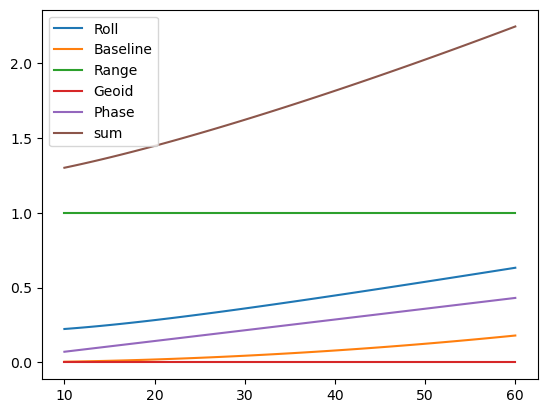

In [61]:
plt.plot(x, dh_roll*100)
plt.plot(x, dh_baseline*100)
plt.plot(x, dh_range*100)
plt.plot(x, dh_orbit*100)
plt.plot(x, dh_phase*100)
plt.plot(x, (dh_roll+dh_baseline+dh_range+dh_orbit+dh_phase)*100)

plt.legend(["Roll", "Baseline", "Range", "Geoid", "Phase", "sum"])
#plt.ylim([-2, 10])

In [2]:
def S(k, k1, sigma, C, alpha):
    psd = np.zeros(k.size)
    psd[k<k1] = sigma**2 + C * k1**(-alpha)
    psd[k>k1] = sigma**2 + C * k[k>k1]**(-alpha)
    return psd

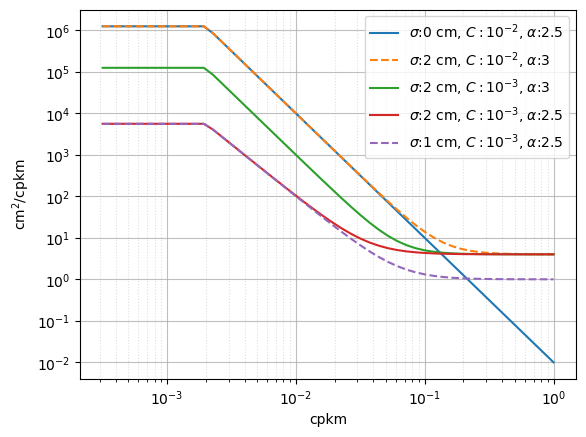

In [12]:
k = np.logspace(-3.5, 0)

fig, ax = plt.subplots()
ax.loglog(k, S(k, 500**(-1), 0, 1e-2, 3))
ax.loglog(k, S(k, 500**(-1), 2, 1e-2, 3), linestyle="--")
ax.loglog(k, S(k, 500**(-1), 2, 1e-3, 3))
ax.loglog(k, S(k, 500**(-1), 2, 1e-3, 2.5))
ax.loglog(k, S(k, 500**(-1), 1, 1e-3, 2.5), linestyle="--")
ax.legend([r"$\sigma$:0 cm, $C:10^{-2}$, $\alpha$:2.5",
            r"$\sigma$:2 cm, $C:10^{-2}$, $\alpha$:3",
            r"$\sigma$:2 cm, $C:10^{-3}$, $\alpha$:3",
            r"$\sigma$:2 cm, $C:10^{-3}$, $\alpha$:2.5",
            r"$\sigma$:1 cm, $C:10^{-3}$, $\alpha$:2.5"])
ax.set_xlabel("cpkm")
ax.set_ylabel(r"cm$^2$/cpkm")
ax.set_yticks(np.logspace(-2,6,9))
ax.grid(which="major", alpha=0.8)
ax.grid(which="minor", alpha=0.4, linestyle=":")

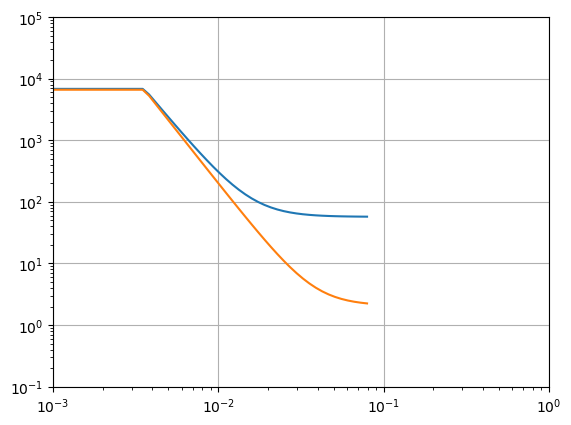

In [67]:
k = np.logspace(-3, -1.1)
plt.loglog(k, S(k, 280**(-1), 2.75**2, 10**(-4), 3.2))
k = np.logspace(-3, -1.1)
plt.loglog(k, S(k, 280**(-1), 1.2**2, 10**(-4.5), 3.4))
plt.ylim([1e-1, 1e5])
plt.xlim([1e-3, 1e0])
plt.grid()

In [50]:
SWH = 3
N = 11

sigma = SWH/4

red_var = sigma/np.sqrt(N)
print("Original variance: {:.2f}".format(sigma))
print("Reduced variance: {:.2f} with N: {}".format(red_var, N))
print("N for variance of 1 cm: {}".format((sigma/0.01)**2))

Original variance: 0.75
Reduced variance: 0.23 with N: 11
N for variance of 1 cm: 5625.0
